In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
## Loading the datasets
sentiment = pd.read_csv('sentiment.csv')
trades = pd.read_csv('trades.csv')

In [ ]:
## Print the top columns to check the colunms are loaded perfectly or not
print(sentiment.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [ ]:
print(trades.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [ ]:
## Checking how many columns and rows are there
print("sentiment_Shape :",sentiment.shape)
print("trade_shape :",trades.shape)

sentiment_Shape : (2644, 4)
trade_shape : (211224, 16)


In [ ]:
## Checking is there any null values in dataset
sentiment.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [ ]:
trades.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
## Cheking the column names
sentiment.columns.values

array(['timestamp', 'value', 'classification', 'date'], dtype=object)

In [ ]:
trades.columns.values

array(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD',
       'Side', 'Timestamp IST', 'Start Position', 'Direction',
       'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee',
       'Trade ID', 'Timestamp'], dtype=object)

In [ ]:
## Convert and Cleaning the Sentiment Dataset
## If the column has string it will convert to Time object or nat value
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

In [ ]:
## renaming the column names
sentiment.rename(columns={'Date':'date', 'Classification':'sentiments'}, inplace=True)

In [ ]:
## Performing EDA on Trades Dataset
print("Number of trades:", trades.shape[0])   ## No.of rows(trades)
print("Number of columns:", trades.shape[1])  ## No.of columns(features)


Number of trades: 211224
Number of columns: 16


In [ ]:
trades.columns.tolist()

['Account',
 'Coin',
 'Execution Price',
 'Size Tokens',
 'Size USD',
 'Side',
 'Timestamp IST',
 'Start Position',
 'Direction',
 'Closed PnL',
 'Transaction Hash',
 'Order ID',
 'Crossed',
 'Fee',
 'Trade ID',
 'Timestamp']

In [ ]:
trades.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [ ]:
### Showing the unique values in the side and  Direction column
for col in ['Side', 'Direction']:                        ## Like how many "BUYS" and "SELLS" are there
    if col in trades.columns:                            ## Like how many directions
        print(f"\nUnique values in {col}:")
        print(trades[col].value_counts())



Unique values in Side:
Side
SELL    108528
BUY     102696
Name: count, dtype: int64

Unique values in Direction:
Direction
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36013
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64


In [ ]:
## numeric Columns which we want to analysis
trades.select_dtypes(include=['float64', 'int64']).columns.tolist()


['Execution Price',
 'Size Tokens',
 'Size USD',
 'Start Position',
 'Closed PnL',
 'Order ID',
 'Fee',
 'Trade ID',
 'Timestamp']

{'whiskers': [<matplotlib.lines.Line2D at 0x7dc79d870860>,
 'caps': [<matplotlib.lines.Line2D at 0x7dc79d870d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dc79e42ea50>],
 'medians': [<matplotlib.lines.Line2D at 0x7dc79d871280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dc79d871580>],
 'means': []}

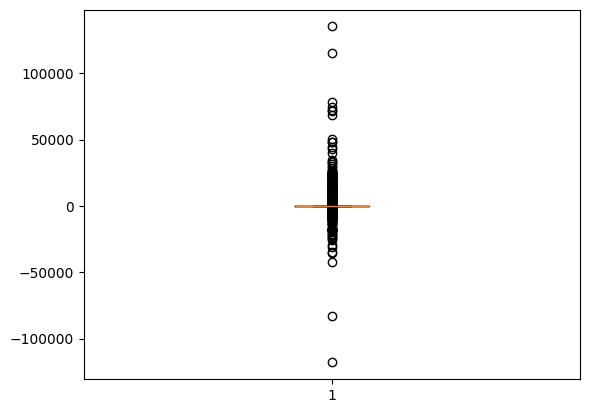

In [ ]:
## Checking is there any outliers in Closed PnL Column
plt.boxplot(trades['Closed PnL'])

(array([1.00000e+00, 1.00000e+00, 0.00000e+00, 2.20000e+01, 2.11036e+05,
        1.50000e+02, 7.00000e+00, 5.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([-117990.1041 ,  -92658.18468,  -67326.26526,  -41994.34584,
         -16662.42642,    8669.493  ,   34001.41242,   59333.33184,
          84665.25126,  109997.17068,  135329.0901 ]),
 <BarContainer object of 10 artists>)

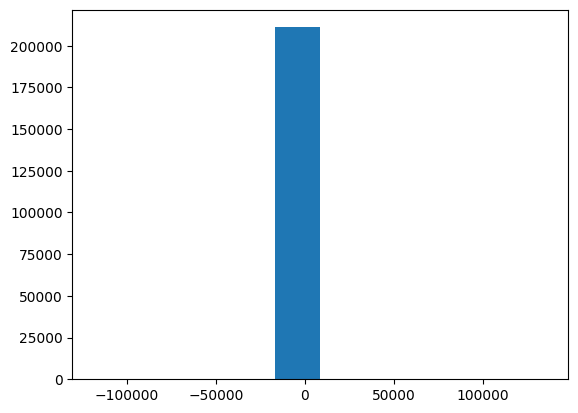

In [ ]:
## Seeing the data is Distribution
plt.hist(trades['Closed PnL'])

We can see that the is normaly distributed not Right and Left skwness
But data is slightly laying to Negative side means the Loss are more than profit


In [ ]:
profit = trades['Closed PnL'].sum() > 0
print(profit)
loss = trades['Closed PnL'].sum() < 0
print(loss)

True
False


In [ ]:
### Removing or Updating the outliers is not good method
### In financial and trading data, outliers are not always errors they can represent real, meaningful market events

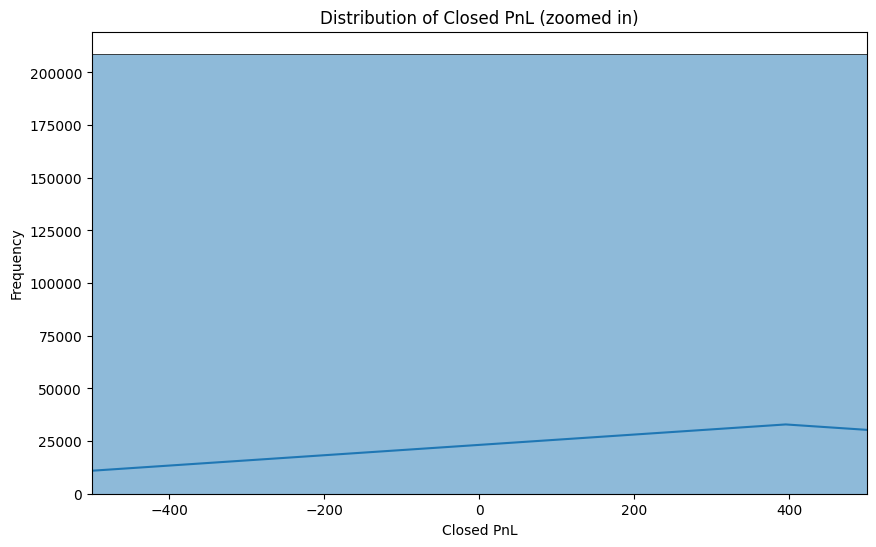

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(trades['Closed PnL'], bins=100, kde=True)
plt.xlim(-500, 500)   # focus on smaller range
plt.title('Distribution of Closed PnL (zoomed in)')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.show()


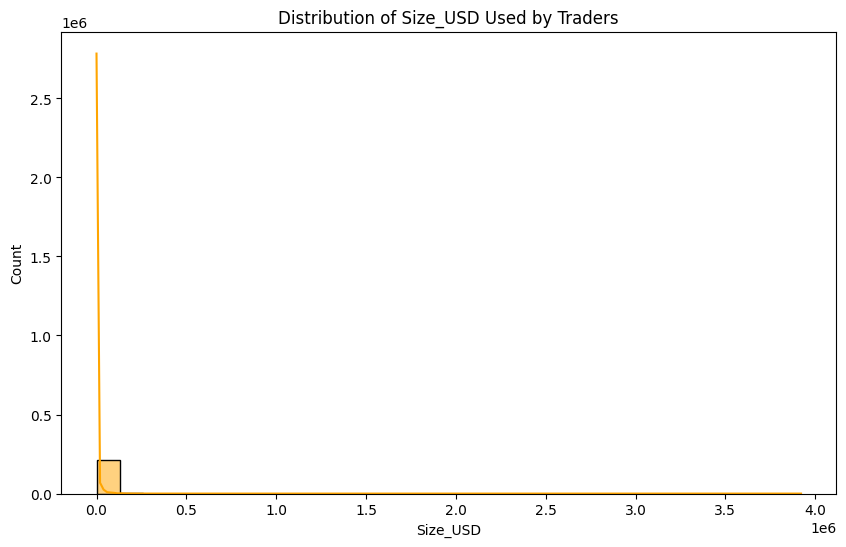

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(trades['Size USD'], bins=30, kde=True, color='orange')
plt.title('Distribution of Size_USD Used by Traders')
plt.xlabel('Size_USD')
plt.ylabel('Count')
plt.show()


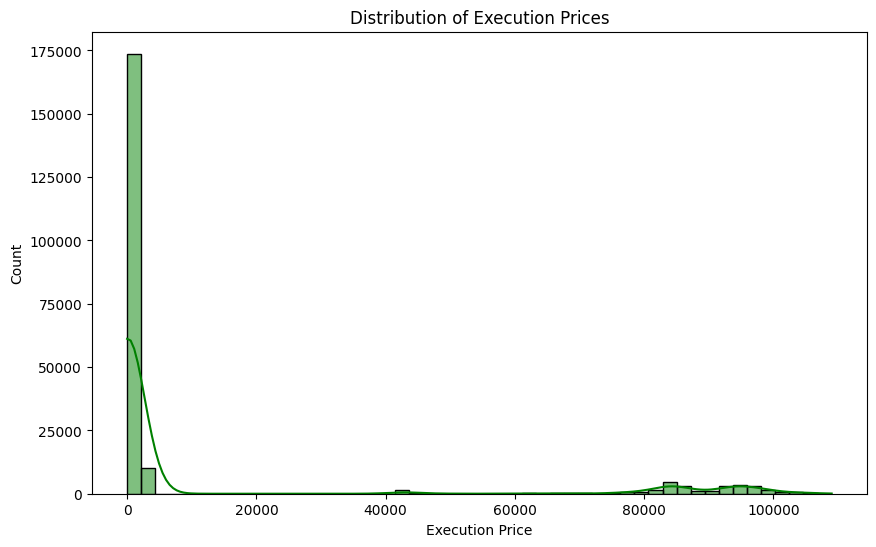

In [ ]:
## 3.Execution Price
plt.figure(figsize=(10,6))
sns.histplot(trades['Execution Price'], bins=50, kde=True, color='green')
plt.title('Distribution of Execution Prices')
plt.xlabel('Execution Price')
plt.ylabel('Count')
plt.show()


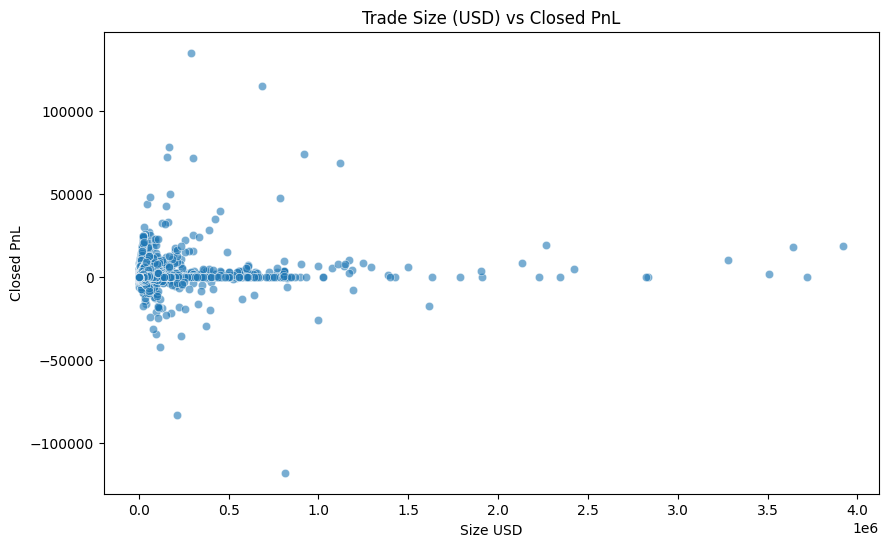

In [ ]:
 ##  Size(USD) v Closwd PnL
plt.figure(figsize=(10,6))
sns.scatterplot(data=trades, x='Size USD', y='Closed PnL', alpha=0.6)
plt.title('Trade Size (USD) vs Closed PnL')
plt.xlabel('Size USD')
plt.ylabel('Closed PnL')
plt.show()

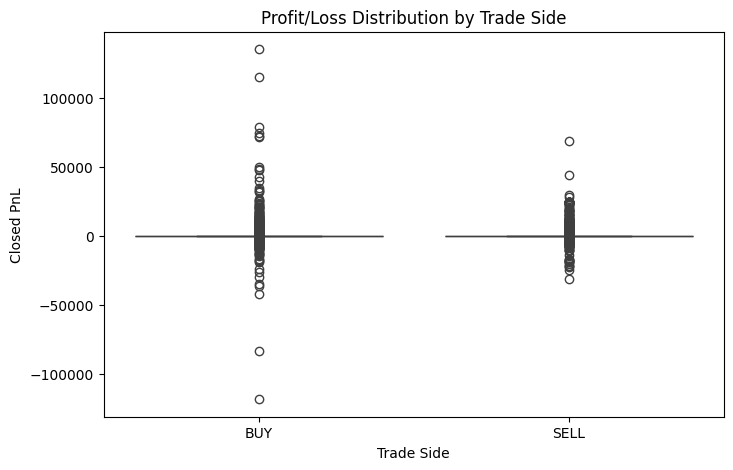

In [ ]:
### side(Buy/Sell) Analysis
plt.figure(figsize=(8,5))
sns.boxplot(x='Side', y='Closed PnL', data=trades)
plt.title('Profit/Loss Distribution by Trade Side')
plt.xlabel('Trade Side')
plt.ylabel('Closed PnL')
plt.show()

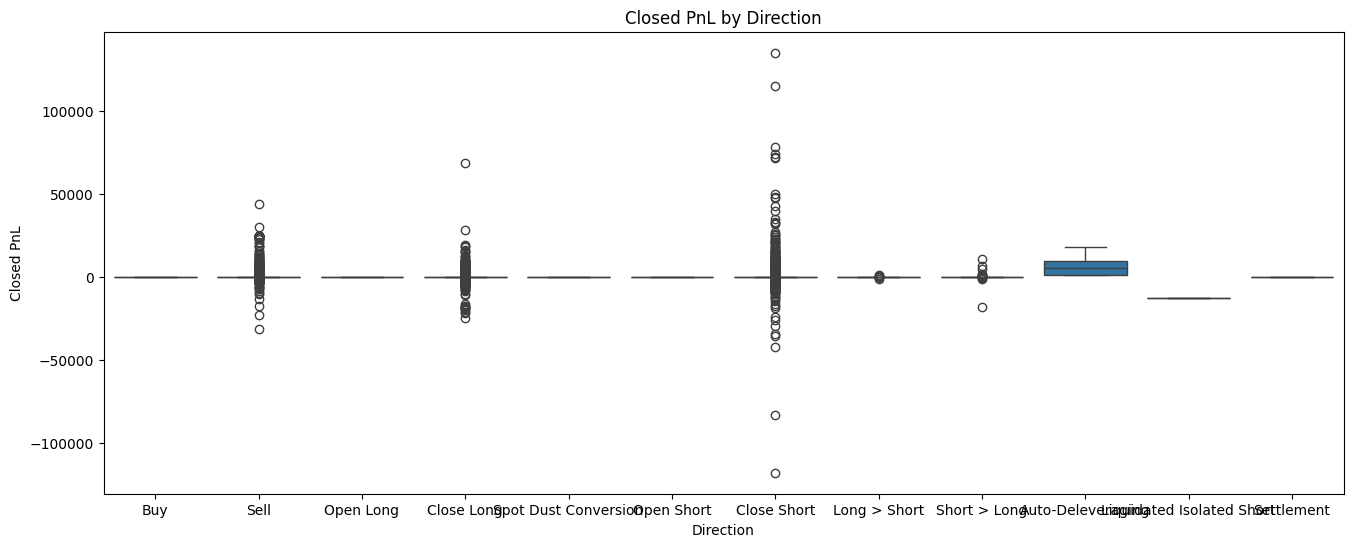

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Direction', y='Closed PnL', data=trades)
plt.title('Closed PnL by Direction')
plt.show()

In [ ]:
sentiment.head()
sentiment.info()
sentiment['classification'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


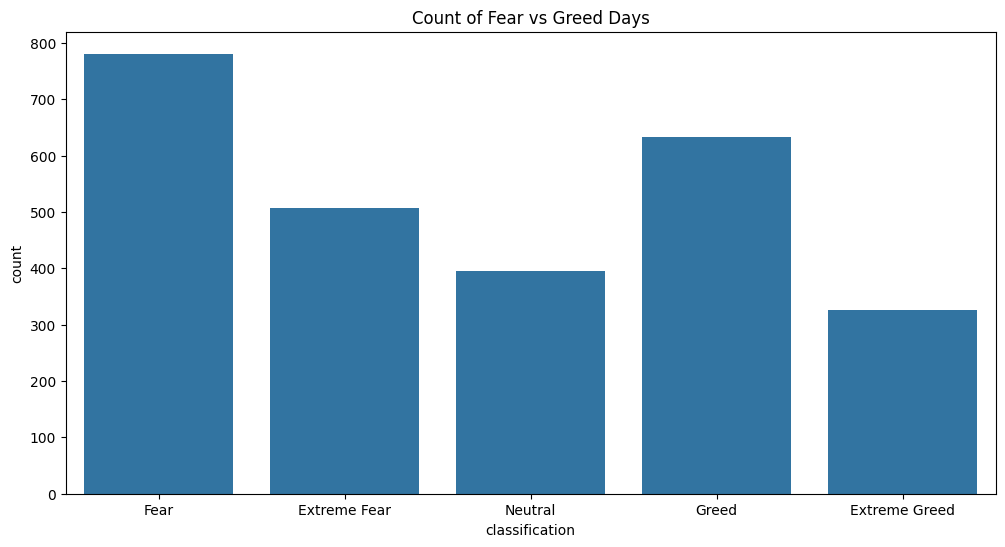

In [ ]:
plt.figure(figsize=(12,6))
sentiment['date'] = pd.to_datetime(sentiment['date'])
sns.countplot(x='classification', data=sentiment)
plt.title('Count of Fear vs Greed Days')
plt.show()

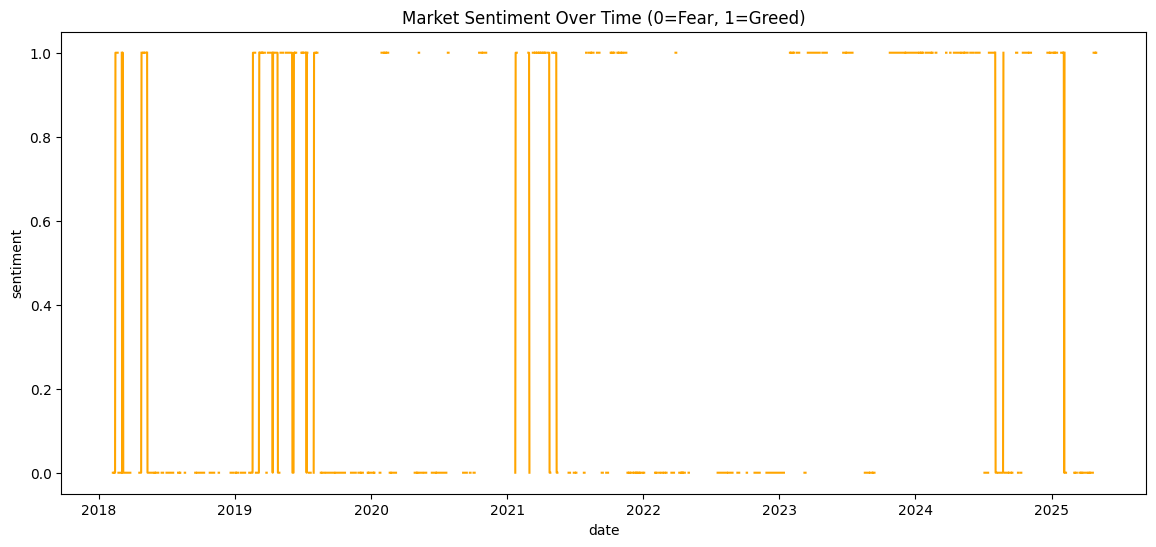

In [ ]:
plt.figure(figsize=(14,6))
sentiment['sentiment_num'] = sentiment['classification'].map({'Fear': 0, 'Greed': 1})
plt.plot(sentiment['date'], sentiment['sentiment_num'], color='orange')
plt.title('Market Sentiment Over Time (0=Fear, 1=Greed)')
plt.xlabel('date')
plt.ylabel('sentiment')
plt.show()

In [ ]:
# Convert Timestamp IST to proper datetime format
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')

# Drop rows where Timestamp IST is NaT (couldn't be converted)
trades.dropna(subset=['Timestamp IST'], inplace=True)

# Extract only the date part (without time)
trades['Date'] = trades['Timestamp IST'].dt.date

# Verify it worked
print("Trader date range after conversion:")
print("Min:", trades['Date'].min())
print("Max:", trades['Date'].max())

Trader date range after conversion:
Min: 2023-01-05
Max: 2025-12-04


In [ ]:
# Aggregate key metrics by day
daily_trades = trades.groupby('Date').agg(
    total_trades=('Account', 'count'),
    avg_pnl=('Closed PnL', 'mean'),
    total_pnl=('Closed PnL', 'sum'),
    median_pnl=('Closed PnL', 'median'),
    avg_trade_size=('Size USD', 'mean')
).reset_index()

print("Daily trades created successfully!")
print("Rows:", len(daily_trades))
print("Date range:", daily_trades['Date'].min(), "→", daily_trades['Date'].max())

daily_trades.head()


Daily trades created successfully!
Rows: 188
Date range: 2023-01-05 → 2025-12-04


,Date,total_trades,avg_pnl,total_pnl,median_pnl,avg_trade_size
0,2023-01-05,3,0.000000,0.000000,0.00000,159.000000
1,2023-05-12,9,0.000000,0.000000,0.00000,5556.203333
2,2024-01-01,18,-7.196192,-129.531460,0.00000,14679.973889
3,2024-01-02,6,0.000000,0.000000,0.00000,334.696667
4,2024-01-03,137,60.176945,8244.241409,27.04384,3452.370073


In [ ]:
sentiment['Date'] = pd.to_datetime(sentiment['date'], errors='coerce').dt.date
#sentiment.rename(columns={'Classification': 'classification'}, inplace=True)

print("Sentiment date range:")
print("Min:", sentiment['date'].min())
print("Max:", sentiment['date'].max())


Sentiment date range:
Min: 2018-02-01 00:00:00
Max: 2025-05-02 00:00:00


In [ ]:
## Merging the two data's
merged = pd.merge(daily_trades, sentiment, on='Date', how='inner')
print("✅ Merged shape:", merged.shape)
merged.head()


✅ Merged shape: (158, 11)


,Date,total_trades,avg_pnl,total_pnl,median_pnl,avg_trade_size,timestamp,value,classification,date,sentiment_num
0,2023-01-05,3,0.000000,0.000000,0.00000,159.000000,1672896600,29,Fear,2023-01-05,0.0
1,2023-05-12,9,0.000000,0.000000,0.00000,5556.203333,1683869400,49,Neutral,2023-05-12,NaN
2,2024-01-01,18,-7.196192,-129.531460,0.00000,14679.973889,1704087000,65,Greed,2024-01-01,1.0
3,2024-01-02,6,0.000000,0.000000,0.00000,334.696667,1704173400,71,Greed,2024-01-02,1.0
4,2024-01-03,137,60.176945,8244.241409,27.04384,3452.370073,1704259800,70,Greed,2024-01-03,1.0


In [ ]:
## How many dates are overlapping fom two data's
print("Overlapping dates:", len(set(daily_trades['Date']).intersection(set(sentiment['Date']))))


Overlapping dates: 158


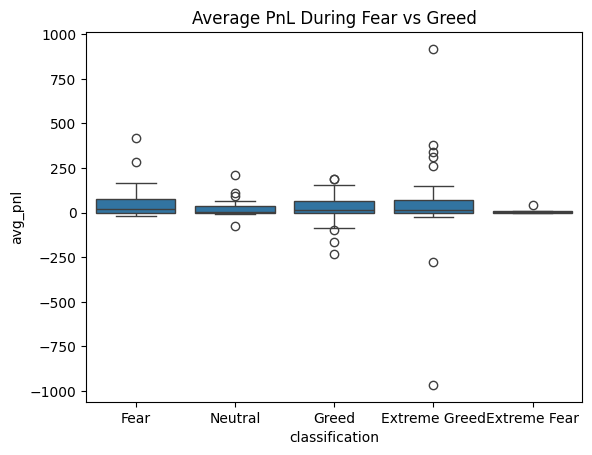

In [ ]:
sns.boxplot(x='classification', y='avg_pnl', data=merged)
plt.title('Average PnL During Fear vs Greed')
plt.show()


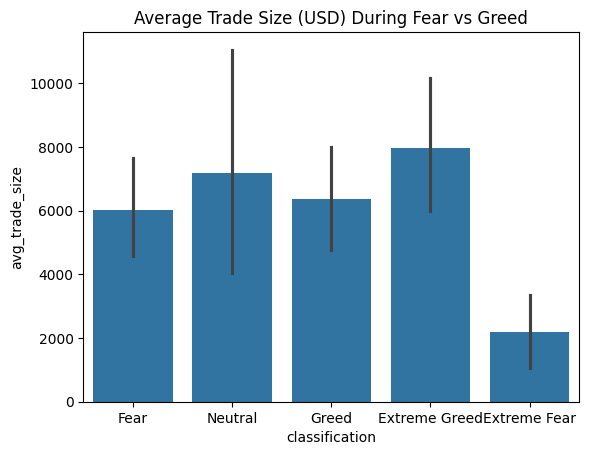

In [ ]:
sns.barplot(x='classification', y='avg_trade_size', data=merged)
plt.title('Average Trade Size (USD) During Fear vs Greed')
plt.show()


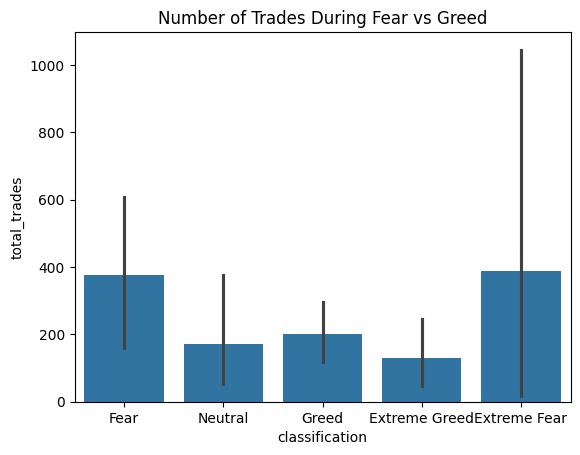

In [ ]:
sns.barplot(x='classification', y='total_trades', data=merged)
plt.title('Number of Trades During Fear vs Greed')
plt.show()


Traders execute more trades during Greed days (higher activity).

Average profit/loss tends to be lower during Fear periods.

Average trade size (USD) increases when market sentiment turns Greedy, indicating higher risk-taking.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
sentiment = pd.read_csv('MyDrive/ds_SatyaSaiKishore/csv_files/sentiment.csv')
trades = pd.read_csv('MyDrive/ds_SatyaSaiKishore/csv_files/trades.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'MyDrive/ds_SatyaSaiKishore/csv_files/sentiment.csv'